In [401]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import skew
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib

# Leitura dos dados

In [402]:
#Carregamento dos dados
data = pd.read_csv('data.csv', delimiter=',')

data2014 = pd.read_csv('test.csv', delimiter=',')

# Inspecionando primeiras linhas

In [403]:
#Primeiras linhas
data.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


# Inspecionando últimas linhas

In [404]:
#últimas linhas
data.tail()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
7325,2010,270000000264,ROBERTO PEREIRA URBANO,TO,PSC,3,3,3370.00,1123.333333,370.00,...,16,16,3363.41,210.213125,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO,3013
7326,2010,270000000265,RONALDO DIMAS NOGUEIRA PEREIRA,TO,PR,715,706,1034323.16,1465.046969,211804.58,...,1658,1275,815638.26,639.716282,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ENGENHEIRO,35980
7327,2010,270000000266,SÉRGIO PERIN,TO,PTB,2,2,2600.00,1300.000000,NaN,...,2,2,2600.00,1300.000000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),ODONTÓLOGO,20
7328,2010,270000000267,ÍTALO MARCEL COSTA CONCEIÇÃO,TO,PR,2,2,5175.00,2587.500000,3375.00,...,2,2,5175.00,2587.500000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BANCÁRIO E ECONOMIÁRIO,293
7329,2010,270000000501,LEONAM XAVIER GOMES,TO,PPS,13,12,33852.82,2821.068333,30083.67,...,47,46,36739.62,798.687391,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,1248


# Removendo pouco discriminatórias e redundâncias

Obervando inicialmente as colunas que caracterizam os os dados, percebemos que, se quizermos predizer a quantidade de votos que um candidato terá, é necessário analisar quais colunas realmente são discriminatórias para quantidade de votos obtidos por um candidato.

A coluna "ano" pouco diz sobre a quantidade de votos que o candidato recebeu, imagenemos que em 2006 o candidato recebeu 20 mil votos e em 2010 recebeu 30 mil. O ano em sí, não caracteriza o aumento de votos, mas o conjunto de fatores que mudaram de um ano eletivo para o outro. Logo, essa coluna não será considerada para a construção do modelo.

As colunas "sequencial_candidato", "nome", "cargo" e "ocupação" são apenas informativas para caracterizar o candidato dentro do conjunto de informações, tabém não serão consideradas.

Analisando as colunas "quantidade_doacoes" e "quantidade_doadores", podemos obervar que elas possuem informações redundantes, visto que para a maior parte dos candidatos a quantidade de doações é explicada pela quantidade de doadores, ou seja, sempre que existe um doador existirá uma doação. Logo, a coluna "quantidade_doadores" não será considerada.

Dentre as colunas "quantidade_despesas" e "quantidade_fornecedores", consideramos o mesmo posicionamento da "quantidade_doacoes". Logo, a coluna "quantidade_fornecedores" não será considerada.

Sendo assim, as colunas que serão usadas para treinar os modelos e tentar predizer a quantidade de votos indicado na coluna "votos" (variável alvo) são:

"uf": (character)

"partido": (character)

"quantidade_doacoes": (integer)

"total_receita": (double) soma em R$ das doações

"media_receita": (double) média das doações

"recursos_de_outros_candidatos/comites": (double) quantia em R$ das doações provenientes de outros candidatos ou comite partidário

"recursos_de_pessoas_fisicas": (double) quantia em R$ das doações provenientes de outros CPFs

"recursos_de_pessoas_juridicas": (double) quantia em R$ das doações provenientes de outros CNPJ

"recursos_proprios": (double) quantia em R$ das doações provenientes do próprio candidato

"quantidade_despesas": (integer)

"total_despesa": (double) soma em R$ das despesas de campanha

"media_despesa": (double) média das despesas de campanha

"sexo":  (character)

"grau": (character) grau de instrução do candidato

"estado_civil": (character)

In [405]:
#Removendo colunas com dados irrelevantes e redundantes
data = data.drop(['cargo', 'ocupacao' , 'sequencial_candidato', 'nome', 'quantidade_doadores', 'quantidade_fornecedores'], axis=1)

data2014 = data2014.drop(['cargo', 'ocupacao' , 'sequencial_candidato', 'nome', 'quantidade_doadores', 'quantidade_fornecedores'], axis=1)

# Normalizando informações quantitativas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429EDF79B0>,
      dtype=object)

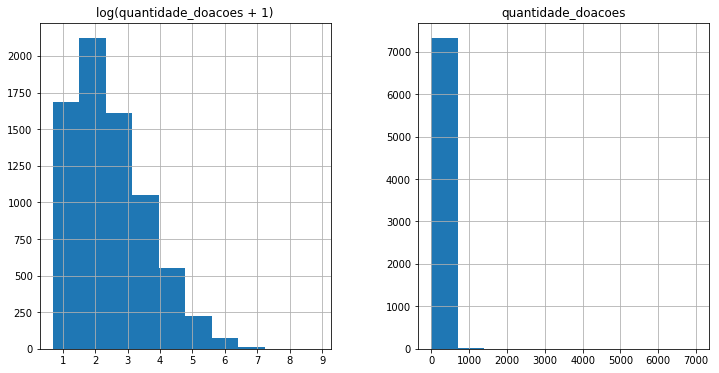

In [406]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "quantidade_doacoes"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

qtd_doacoes = pd.DataFrame({"quantidade_doacoes":data["quantidade_doacoes"], "log(quantidade_doacoes + 1)":np.log1p(data["quantidade_doacoes"])})
qtd_doacoes.hist()

Na amostra original da coluna "quantidade_doacoes", vemos que, antes da aplicação da normalização, os dados estão concentrados a direita e, após a aplicação da normalização, os dados ficaram melhor distribuídos. Iremos analisar a necessidade para as demais colunas, mas só aplicaremos a normalizalção nas que realmente necessitarem.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429F1B8A20>,
      dtype=object)

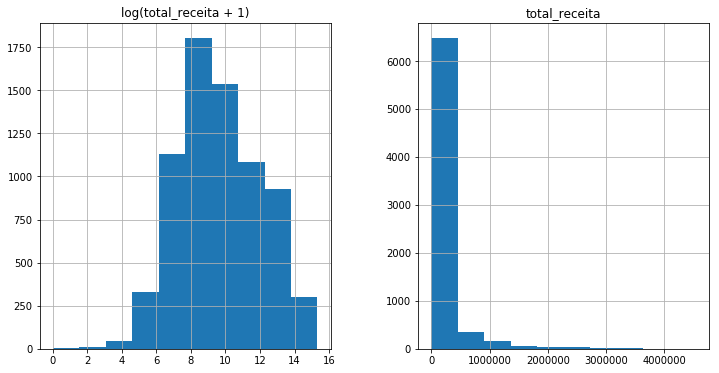

In [407]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "total_receita"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

total_receita = pd.DataFrame({"total_receita":data["total_receita"], "log(total_receita + 1)":np.log1p(data["total_receita"])})
total_receita.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242A00202B0>,
      dtype=object)

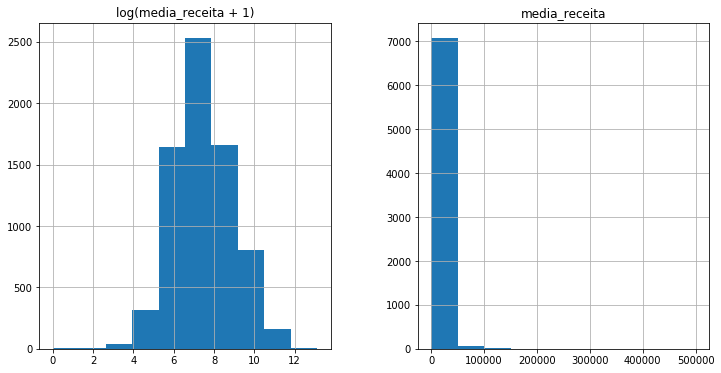

In [408]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "media_receita"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

media_receita = pd.DataFrame({"media_receita":data["media_receita"], "log(media_receita + 1)":np.log1p(data["media_receita"])})
media_receita.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429FF087B8>,
      dtype=object)

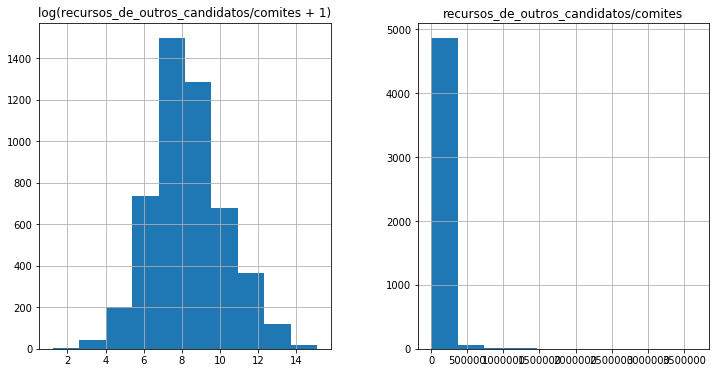

In [409]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_de_outros_candidatos/comites"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

recursos_de_outros_candidatos_comites = pd.DataFrame({"recursos_de_outros_candidatos/comites":data["recursos_de_outros_candidatos/comites"], "log(recursos_de_outros_candidatos/comites + 1)":np.log1p(data["recursos_de_outros_candidatos/comites"])})
recursos_de_outros_candidatos_comites.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429FF82198>,
      dtype=object)

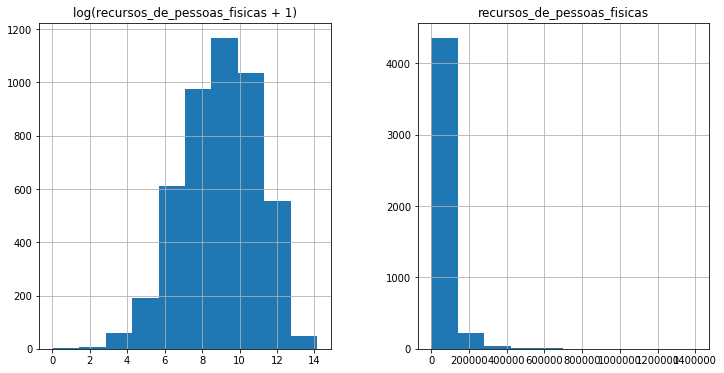

In [410]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_de_pessoas_fisicas"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

recursos_de_pessoas_fisicas = pd.DataFrame({"recursos_de_pessoas_fisicas":data["recursos_de_pessoas_fisicas"], "log(recursos_de_pessoas_fisicas + 1)":np.log1p(data["recursos_de_pessoas_fisicas"])})
recursos_de_pessoas_fisicas.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242A01C4B38>,
      dtype=object)

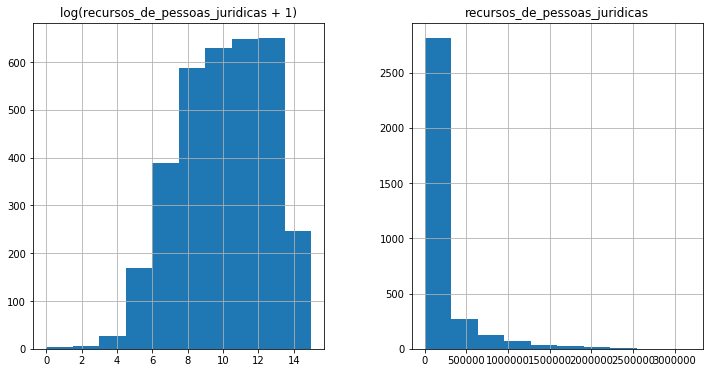

In [411]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_de_pessoas_juridicas"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

recursos_de_pessoas_juridicas = pd.DataFrame({"recursos_de_pessoas_juridicas":data["recursos_de_pessoas_juridicas"], "log(recursos_de_pessoas_juridicas + 1)":np.log1p(data["recursos_de_pessoas_juridicas"])})
recursos_de_pessoas_juridicas.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242A0219978>,
      dtype=object)

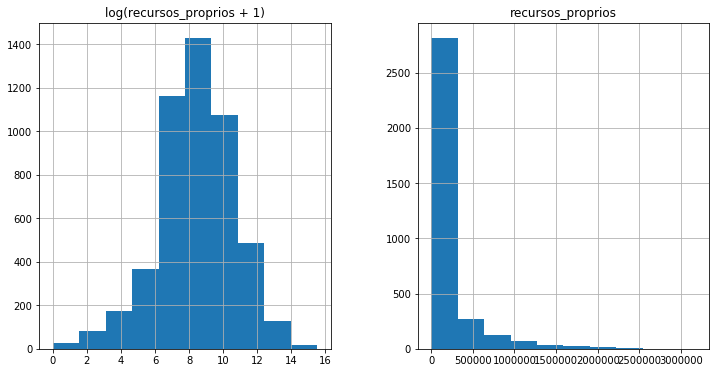

In [412]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "recursos_proprios"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

recursos_proprios = pd.DataFrame({"recursos_proprios":data["recursos_de_pessoas_juridicas"], "log(recursos_proprios + 1)":np.log1p(data["recursos_proprios"])})
recursos_proprios.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242A067DA58>,
      dtype=object)

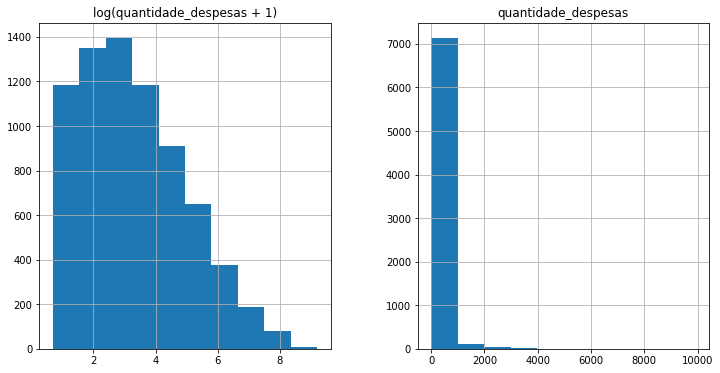

In [413]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "quantidade_despesas"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

quantidade_despesas = pd.DataFrame({"quantidade_despesas":data["quantidade_despesas"], "log(quantidade_despesas + 1)":np.log1p(data["quantidade_despesas"])})
quantidade_despesas.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002429A315AC8>,
      dtype=object)

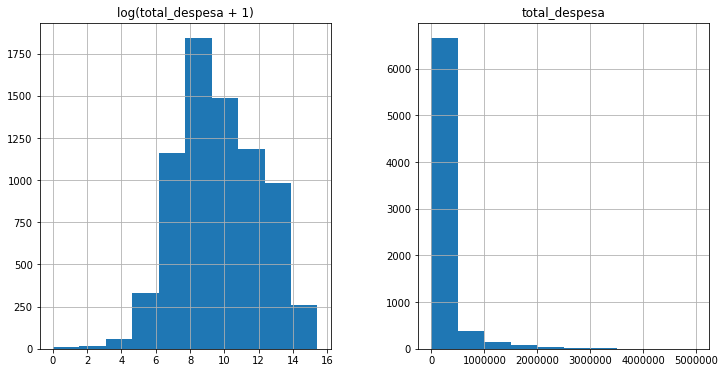

In [414]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "total_despesa"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

total_despesa = pd.DataFrame({"total_despesa":data["total_despesa"], "log(total_despesa + 1)":np.log1p(data["total_despesa"])})
total_despesa.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242A06473C8>,
      dtype=object)

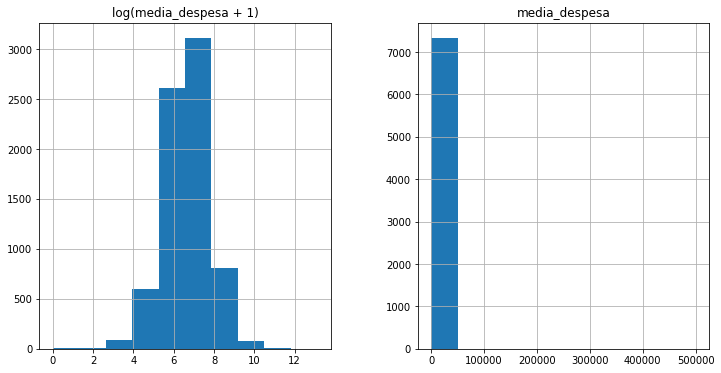

In [415]:
#Analisando a necessidade de normalização(log) tomando como exemplo os dados da coluna "media_despesa"
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

media_despesa = pd.DataFrame({"media_despesa":data["media_despesa"], "log(media_despesa + 1)":np.log1p(data["media_despesa"])})
media_despesa.hist()

Obervando as disctribuilões originais de todas as colunas com informações numéricas, percebemos que todas precisam passar por um processo de normalização dos dados.

In [416]:
#Transformando os dados originais em dados normalizados 2006 e 2010 

numeric_feats = data.dtypes[data.dtypes != "object"].index

skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data[skewed_feats] = np.log1p(data[skewed_feats])

In [417]:
#Transformando os dados originais em dados normalizados 2014

numeric_feats = data2014.dtypes[data2014.dtypes != "object"].index

skewed_feats = data2014[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

data2014[skewed_feats] = np.log1p(data2014[skewed_feats])

In [418]:
#Primeiras linhas
data.head()

,ano,uf,partido,quantidade_doacoes,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,total_despesa,media_despesa,sexo,grau,estado_civil,votos
0,2006,AP,PT,1.945910,9.717218,7.925760,NaN,9.105091,8.748464,7.170888,2.708050,9.716230,7.077956,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),9.057189
1,2006,RO,PT,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,9.919705,6.785292,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),7.922261
2,2006,AP,PT,2.890372,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,11.891449,7.210050,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),9.765891
3,2006,MS,PRONA,1.945910,8.007074,6.216979,NaN,7.048386,7.004991,6.621406,2.197225,8.007074,5.929961,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),7.085064
4,2006,RO,PT,3.891820,NaN,NaN,NaN,10.837206,NaN,11.141035,4.897840,11.664939,6.878469,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),10.288818


In [419]:
#Últimas linhas
data.tail()

,ano,uf,partido,quantidade_doacoes,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,total_despesa,media_despesa,sexo,grau,estado_civil,votos
7325,2010,TO,PSC,1.386294,8.122965,7.024946,5.916202,NaN,NaN,8.006701,2.833213,8.121008,5.352868,MASCULINO,SUPERIOR COMPLETO,CASADO(A),8.011023
7326,2010,TO,PR,6.573680,13.849259,7.290325,12.263424,12.975068,12.063939,10.257694,7.413970,13.611727,6.462587,MASCULINO,SUPERIOR COMPLETO,CASADO(A),10.490746
7327,2010,TO,PTB,1.098612,7.863651,7.170888,NaN,NaN,NaN,6.398595,1.098612,7.863651,7.170888,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),3.044522
7328,2010,TO,PR,1.098612,8.551788,7.858834,8.124447,7.496097,NaN,NaN,1.098612,8.551788,7.858834,MASCULINO,SUPERIOR COMPLETO,CASADO(A),5.683580
7329,2010,TO,PPS,2.639057,10.429807,7.945225,10.311771,6.216606,NaN,8.743556,3.871201,10.511638,6.684221,MASCULINO,SUPERIOR COMPLETO,CASADO(A),7.130099


# Tratando dados inexistentes

Obervando os dados para construção do modelo, percebemos que algumas colunas estão sem informação (NA). Vamos tratar esses dados preenchendo-os com a mediana da coluna a qual ele pertence, além disso, transformar as variáveis categóricas.

In [420]:
# Dados 2006 e 2010
# Colunas com valores numéricos
columns_values = ['quantidade_doacoes', 'total_receita', 'media_receita', 
                    'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
                    'recursos_proprios', 'quantidade_despesas', 'total_despesa', 'media_despesa']

columns_categories = ['uf','partido', 'sexo', 'grau', 'estado_civil']

# TRanformando dados categóricos
data_dummies = pd.get_dummies(pd.DataFrame(data[columns_categories]))

# Inserindo a mediana de cada coluna no valores NA de cada coluna
data_values = data[columns_values]
data[columns_values] = data_values.fillna(data_values.median())

# Unindo os novos dados categóricos com os novos dados para valores NA
data = pd.concat([data, data_dummies], axis=1, sort=False)

# Removendo colunas categóricas originais
data_processed = data.drop(columns_categories, axis=1)

In [421]:
# Dados 2006 e 2014
# Colunas com valores numéricos
columns_values = ['quantidade_doacoes', 'total_receita', 'media_receita', 
                    'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas', 'recursos_de_pessoas_juridicas',
                    'recursos_proprios', 'quantidade_despesas', 'total_despesa', 'media_despesa']

columns_categories = ['uf','partido', 'sexo', 'grau', 'estado_civil']

# TRanformando dados categóricos
data_dummies = pd.get_dummies(pd.DataFrame(data2014[columns_categories]))

# Inserindo a mediana de cada coluna no valores NA de cada coluna
data_values = data2014[columns_values]
data2014[columns_values] = data_values.fillna(data_values.median())

# Unindo os novos dados categóricos com os novos dados para valores NA
data2014 = pd.concat([data2014, data_dummies], axis=1, sort=False)

# Removendo colunas categóricas originais
data_2014 = data2014.drop(columns_categories, axis=1)

In [422]:
#Primeiras linhas
data_processed.head()

,ano,quantidade_doacoes,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,total_despesa,...,grau_ENSINO MÉDIO COMPLETO,grau_ENSINO MÉDIO INCOMPLETO,grau_LÊ E ESCREVE,grau_SUPERIOR COMPLETO,grau_SUPERIOR INCOMPLETO,estado_civil_CASADO(A),estado_civil_DIVORCIADO(A),estado_civil_SEPARADO(A) JUDICIALMENTE,estado_civil_SOLTEIRO(A),estado_civil_VIÚVO(A)
0,2006,1.945910,9.717218,7.925760,8.167230,9.105091,8.748464,7.170888,2.708050,9.716230,...,1,0,0,0,0,1,0,0,0,0
1,2006,2.639057,10.035699,7.471276,8.798757,9.615872,6.908755,5.308268,3.218876,9.919705,...,0,0,0,1,0,0,0,0,1,0
2,2006,2.890372,11.905790,9.133303,7.719130,10.438547,11.038461,10.993748,4.820282,11.891449,...,0,0,0,1,0,0,0,0,0,1
3,2006,1.945910,8.007074,6.216979,8.167230,7.048386,7.004991,6.621406,2.197225,8.007074,...,0,1,0,0,0,1,0,0,0,0
4,2006,3.891820,9.400695,7.340539,8.167230,10.837206,10.170492,11.141035,4.897840,11.664939,...,0,0,0,0,0,1,0,0,0,0


In [423]:
#Últimas linhas
data_processed.tail()

,ano,quantidade_doacoes,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,quantidade_despesas,total_despesa,...,grau_ENSINO MÉDIO COMPLETO,grau_ENSINO MÉDIO INCOMPLETO,grau_LÊ E ESCREVE,grau_SUPERIOR COMPLETO,grau_SUPERIOR INCOMPLETO,estado_civil_CASADO(A),estado_civil_DIVORCIADO(A),estado_civil_SEPARADO(A) JUDICIALMENTE,estado_civil_SOLTEIRO(A),estado_civil_VIÚVO(A)
7325,2010,1.386294,8.122965,7.024946,5.916202,9.105091,10.170492,8.006701,2.833213,8.121008,...,0,0,0,1,0,1,0,0,0,0
7326,2010,6.573680,13.849259,7.290325,12.263424,12.975068,12.063939,10.257694,7.413970,13.611727,...,0,0,0,1,0,1,0,0,0,0
7327,2010,1.098612,7.863651,7.170888,8.167230,9.105091,10.170492,6.398595,1.098612,7.863651,...,0,0,0,0,1,1,0,0,0,0
7328,2010,1.098612,8.551788,7.858834,8.124447,7.496097,10.170492,8.517393,1.098612,8.551788,...,0,0,0,1,0,1,0,0,0,0
7329,2010,2.639057,10.429807,7.945225,10.311771,6.216606,10.170492,8.743556,3.871201,10.511638,...,0,0,0,1,0,1,0,0,0,0


# Dividindo dados em treinamento e teste

In [424]:
#Dados de treino
data_2006 = data_processed[:3388]
target_train = np.expm1(data_2006['votos'])
data_train = data_2006.drop(['ano', 'votos'],axis=1)

#Dados de teste
data_2010 = data_processed[3389:]
target_test = np.expm1(data_2010['votos'])
data_test = data_2010.drop(['ano', 'votos'],axis=1)

#Dados de treino para 2014
target_2014 = np.expm1(data_2014['votos'])
data_2014 = data_2014.drop(['ano', 'votos'],axis=1)

In [425]:
#Método para retornar os erros (RMSE) da validação cruzada
def rmse_cv(model, train, target):
    rmse= np.sqrt(-cross_val_score(model, train, target, scoring="neg_mean_squared_error", cv = 100))
    return(rmse)

# Construindo modelos de regressão sem regularização

In [426]:
# Modelo linear
model_linear = LinearRegression()

# Computando o RMSE da validação cruzada
cv_linear = rmse_cv(LinearRegression(), data_train, target_train).mean() 
print(cv_linear)

28518.47600903321


O que podemos perceber é que o modelo linear obteve um RMSE médio = 28518.47600903321.

# Testando modelos de regressão sem regularização

In [427]:
# Testando o modelo com os dados de 2010

# Treinando o modelo
linear = LinearRegression().fit(data_train, target_train)

# Predizendo os votos de 2010
target_test_predicted = linear.predict(data_test)

# RMSE
print(np.sqrt(mean_squared_error(target_test, target_test_predicted)))

1763027425018600.0


Após treinar o modelo predizemos os vatos de 2010. O resultado mostra que o erro aumentou no teste RMSE = 1763027425018600.0. Muito acima do erro na treino.

# Construindo modelos de regressão regularizados

In [428]:
#Parâmetro de refinamento referente à taxa de regularização
alphas = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]
ralphas = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32, 33, 34, 35, 36, 37, 38]

# Testando modelo linear com regularização Ridge

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
[28441.55340514271, 28438.53920609453, 28436.00042791046, 28433.891030843457, 28432.1705372269, 28430.803144334943, 28429.757023833146, 28429.00375762952, 28428.517876353617, 28428.27647690566, 28428.258902128637, 28428.446470090505, 28428.822243528775, 28429.370832188102, 28430.078222365522, 28430.931629154893, 28431.91936777163, 28433.030741022256, 28434.25594051588, 28435.58595963435, 28437.012516612547, 28438.527986349443, 28440.125339789167, 28441.798089889937, 28443.540243346008, 28445.34625734955, 28447.21100078124, 28449.12971930329, 28451.09800390043]


Text(0, 0.5, 'Erro (RMSE)')

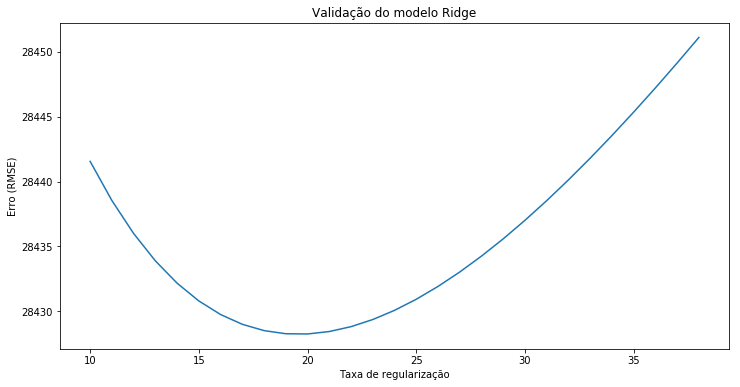

In [429]:
# Modelo ridge

# Computando o RMSE da validação cruzada
cv_ridge = [rmse_cv(Ridge(alpha = alpha), data_train, target_train).mean() 
            for alpha in alphas]
print(alphas)
print(cv_ridge)
#Plotando RMSE do modelo Ridge para todos as taxas de aprendizado testadas por meio da validação cruzada
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validação do modelo Ridge")
plt.xlabel("Taxa de regularização")
plt.ylabel("Erro (RMSE)")

In [430]:
#RMSE mínimo
print(cv_ridge.min())

28428.258902128637


O que podemos perceber é que o modelo linear Ridge para um parâmetro de regularização muito pequeno o RMSE dele é alto, no entanto, a medida com que se aumenta a taxa de regularização do modelo, o RMSE diminui até um certO PONTO e passa a crescer novamente. A taxa de regularização que mais reduziu o RMSE foi o alpha = 20 e obteve um RMSE = 28428.258902128637.

In [431]:
# Testando o modelo com os dados de 2010 com o parâmetro de regularização encontrado na validação cruzada

# Treinando o modelo
ridge = Ridge(alpha = 20).fit(data_train, target_train)

# Predizendo os votos de 2010
target_test_predicted = ridge.predict(data_test)

# RMSE
print(np.sqrt(mean_squared_error(target_test, target_test_predicted)))

38099.058970913335


Após treinar o modelo com a taxa de regularização que reduziu o erro no teste, predizemos os vatos de 2010. O resultado mostra que o erro aumentou no teste RMSE = 38099.058970913335.

# Testando modelo linear com regularização Lasso

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
[28470.678306520018, 28467.988586271334, 28465.387911061425, 28462.97450759664, 28460.855358671895, 28458.83953351808, 28456.84480668912, 28454.856436354425, 28452.97004346799, 28451.372052496547, 28449.966942171868, 28448.759842610263, 28447.574609668598, 28446.551367519845, 28445.623771613675, 28444.898371666524, 28444.32909493104, 28443.9125458779, 28443.62450167192, 28443.379743746747, 28443.183089766786, 28443.06306920066, 28443.06512067221, 28443.211618780773, 28443.470885806033, 28443.87726092624, 28444.341442970763, 28444.863537742072, 28445.509737073393]


Text(0, 0.5, 'Erro (RMSE)')

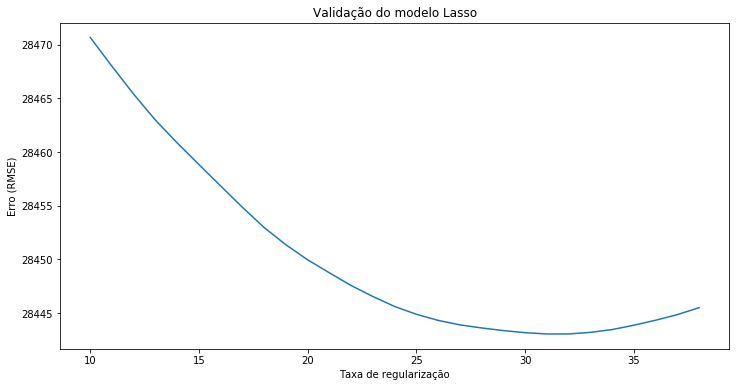

In [432]:
# Modelo lasso

# Computando o RMSE da validação cruzada
cv_lasso = [rmse_cv(Lasso(alpha = alpha, tol = 0.001), data_train, target_train).mean() 
            for alpha in ralphas]

print(ralphas)
print(cv_lasso)
#Plotando RMSE do modelo Lasso para todos as taxas de aprendizado testadas por meio da validação cruzada
cv_lasso = pd.Series(cv_lasso, index = ralphas)
cv_lasso.plot(title = "Validação do modelo Lasso")
plt.xlabel("Taxa de regularização")
plt.ylabel("Erro (RMSE)")

In [433]:
print(cv_lasso.min())

28443.06306920066


O que podemos perceber é que o modelo linear Lasso para um parâmetro de regularização muito pequeno o RMSE dele é alto, no entanto, a medida com que se aumenta a taxa de regularização do modelo, o RMSE diminui até uma certO e, comomno modelo Ridge, passa a crescer novamente. A taxa de regularização que mais reduziu o RMSE médio foi o alpha = 32 e obteve um RMSE = 28443.06306920066.

In [434]:
# Testando o modelo com os dados de 2010 com o parâmetro de regularização encontrado na validação cruzada

# Treinando o modelo
lasso = Lasso(alpha = 32).fit(data_train, target_train)

# Predizendo os votos de 2010
target_test_predicted = lasso.predict(data_test)

# RMSE
print(np.sqrt(mean_squared_error(target_test, target_test_predicted)))

38073.17875279993


Após treinar o modelo com a taxa de regularização que reduziu o erro no teste, predizemos os vatos de 2010. O resultado mostra que o erro aumentou no teste RMSE = 38073.17875279993, continuando baixo, mas maior que o modelo Ridge.

# Testando os modelos nos dados de 2014

In [435]:
# Dados de treino 2006 e 2010
train_Y = np .expm1(data_processed['votos'])
train_X = data_processed.drop(['ano'],axis=1)


# Dados de teste 2014
test_X = data_2014
test_Y = target_2014

In [436]:
# Treinamento dos modelos
linear_model = LinearRegression().fit(train_X, train_Y)

ridge_model = Ridge(alpha = 20).fit(train_X, train_Y)

lasso_model = Lasso(alpha = 32).fit(train_X, train_Y)

xgb_model = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1).fit(train_X, train_Y)

# Predizendo votos de 2014
y_linear = linear_model.predict(test_X)

y_ridge = ridge_model.predict(test_X)

y_lasso = lasso_model.predict(test_X)

# RMSE
print ("Linear RMSE")
print(np.sqrt(mean_squared_error(target_2014, y_linear)))

print ("Ridge RMSE")
print(np.sqrt(mean_squared_error(target_2014, y_ridge)))

print ("Lasso RMSE")
print(np.sqrt(mean_squared_error(target_2014, y_lasso)))

Linear RMSE
262778142204672.97
Ridge RMSE
122820.48199654889
Lasso RMSE
122677.22220284423


# Conclusão

Analisando os modelos testados, podemos obervar que o processo de regularização dos atributos é muito importante para refinamento de modelos lineares. Como podemos obervar nos testes finais usando os dados de 2014 para teste e os dados de 2006 e 2010 para treinamento, o modelo com regularização Lasso foi quem obteve o menor erro RMSE. Os erros em treinamento foram muito altos, como obervamos nos testes iniciais e, aumentaram drásticamente no validação com os dados de 2014. Isso nos possibilita identificar que a tarefa de predizer votos, com os atributos usados neste experimento, não é trivial e confiável. Para tentar melhorar os modelos testados, é preciso atributos mais sigificativos e que possam discriminar melhor a variável alvo.